# AGIW First Homework
---
## 1. Read csv file
---
Read the csv file using Pandas utilities

In [1]:
%matplotlib inline
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd

FILEPATH_PREFIX = '../tag_hist/data'
SPIDERNAME = 'tuttoandroid'
FILENAME = '2019-03-26T17-18-10.csv'
FILEPATH = '{}/{}/{}'.format(FILEPATH_PREFIX, SPIDERNAME, FILENAME)
FILEPATH

'../tag_hist/data/tuttoandroid/2019-03-26T17-18-10.csv'

In [2]:
df = pd.read_csv(FILEPATH)

## 2. Data analysis
---
Some preliminary analysis of the dataset

In [3]:
print("First 5 rows")
print("------------")
df.head()

First 5 rows
------------


,url,tags,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,https://www.tuttoandroid.net/contatti/,187,1,0,0,1,0,1,1,0,...,1,1,0,1,0,1,0,0,1,1
1,https://www.tuttoandroid.net/redazione/,206,1,0,0,1,0,1,1,1,...,0,1,0,1,1,0,1,0,1,1
2,https://www.tuttoandroid.net/pubblicita/,177,1,0,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,1,1
3,https://www.tuttoandroid.net,94,1,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,1
4,https://www.tuttoandroid.net/disclaimer/,167,1,0,1,1,0,1,1,0,...,0,1,0,1,0,0,1,0,1,1


In [4]:
print("No. of rows and columns")
print("-----------------------")
df.shape

No. of rows and columns
-----------------------


(18846, 2050)

In [5]:
print("Check null values")
print("-----------------")
df.isnull().any().any()

Check null values
-----------------


False

In [6]:
print("Check duplicate values")
print("----------------------")
len(df['url'].unique()) != df.shape[0]

Check duplicate values
----------------------


False

In [7]:
print("DataFrame column types")
print("----------------------")
df.info()

DataFrame column types
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Columns: 2050 entries, url to 2047
dtypes: int64(2049), object(1)
memory usage: 294.8+ MB


In [8]:
print("Some stats")
print("----------------")
df['tags'].describe()

Some stats
----------------


count    18846.000000
mean       239.309243
std         93.775312
min         84.000000
25%        196.000000
50%        206.000000
75%        238.000000
max       2389.000000
Name: tags, dtype: float64

## 3. Find templates
---
Plot a histogram of the number of tags of each crawled page to estabilish the number of templates (and clusters)

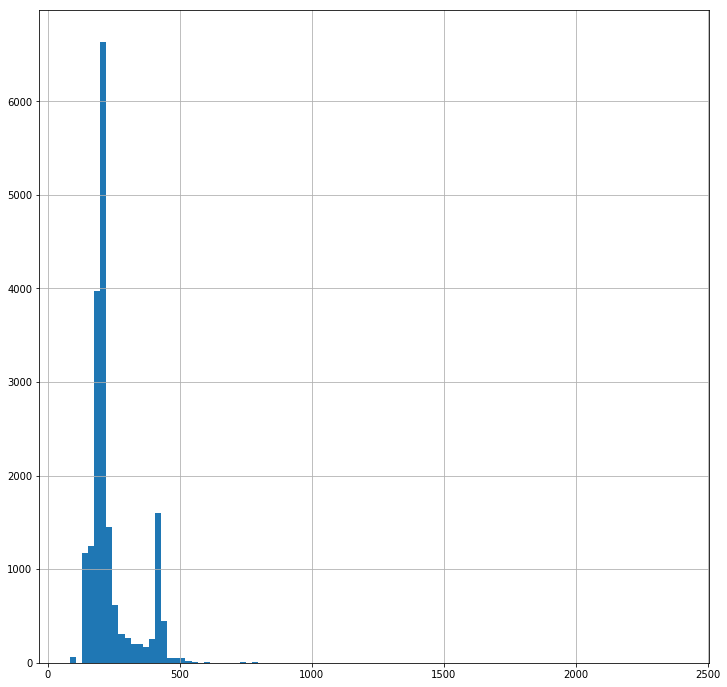

In [9]:
df['tags'].hist(bins = 100, figsize = (12,12))

Let's investigate which templates are associated with the peaks of the histogram above.

---

### Plotting the first peak of the histogram

(150, 400)

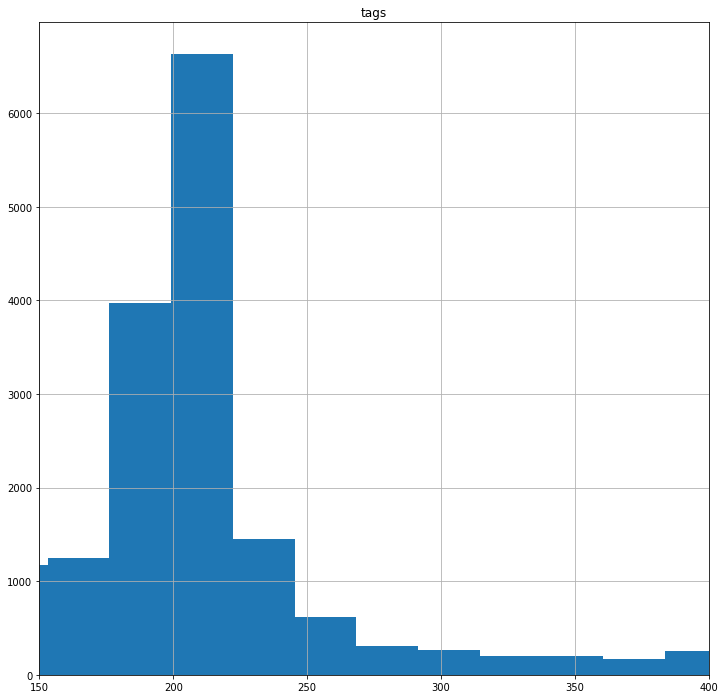

In [10]:
df.hist(column = 'tags', bins = 100, figsize = (12,12))
plt.xlim(150, 400)

In [11]:
# environment settings:
pd.set_option('display.max_colwidth', -1)
df[(df['tags']>=170) & (df['tags']<=220)]['url'].head()

0     https://www.tuttoandroid.net/contatti/                                               
1     https://www.tuttoandroid.net/redazione/                                              
2     https://www.tuttoandroid.net/pubblicita/                                             
11    https://www.tuttoandroid.net/huawei/prova-huawei-mate-x-smartphone-pieghevole-661795/
12    https://www.tuttoandroid.net/huawei/video-anteprima-huawei-mate-x-656693/            
Name: url, dtype: object

The first peak seems to be related to each article page of _tuttoandroid.net_.

---

### Plotting the second peak of the histogram

(0, 2000)

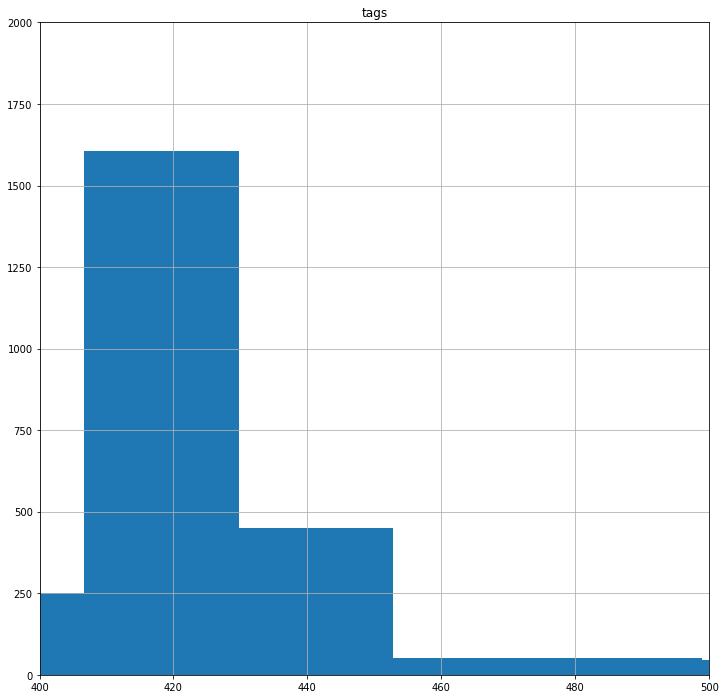

In [12]:
df.hist(column = 'tags', bins = 100, figsize = (12,12))
plt.xlim(400, 500)
plt.ylim(0, 2000)

In [13]:
df[(df['tags']>=410) & (df['tags']<=430)]['url'].head()

6     https://www.tuttoandroid.net/author/admin/                        
8     https://www.tuttoandroid.net/recensioni/samsung-galaxy-s10-664600/
13    https://www.tuttoandroid.net/zte/                                 
17    https://www.tuttoandroid.net/oppo/                                
23    https://www.tuttoandroid.net/tag/chromecast/                      
Name: url, dtype: object

The second peak is instead associated to the pages that show the list of articles in the website.

---

### Add ground truth labels

Once we have found the number of templates in the site we have to add a column in the dataframe which specifies the template associated with each page.
First we need to define a regex for each template found.

In [35]:
import re

#urls associated with the first template (article template)
test_strings1 = ['https://www.tuttoandroid.net/contatti/',
               'https://www.tuttoandroid.net/redazione/',
               'https://www.tuttoandroid.net/pubblicita/',
               'https://www.tuttoandroid.net/google/android-q-sfida-le-precedenti-versioni-dellos-in-un-video-speed-test-667434/',
               'https://www.tuttoandroid.net/android/prima-rom-del-samsung-galaxy-s-2-13052/',
               'https://www.tuttoandroid.net/android/android-gingerbread-2-3-primo-screen-shoot-12130/',
               'https://www.tuttoandroid.net/huawei/video-anteprima-huawei-mate-x-656693/']

#urls associated with the second template (list template)
test_strings2 = ['https://www.tuttoandroid.net/zte/',
                'https://www.tuttoandroid.net/oppo/',
                'https://www.tuttoandroid.net/huawei/page/4/',
                'https://www.tuttoandroid.net/tag/chromecast/']


test_strings = test_strings1 + test_strings2

#article template
article_regex = r'^https\:\/\/www\.tuttoandroid.net\/(contatti|redazione|pubblicita)|(.+\-[0-9]+)\/$'

#list template
list_regex = r'^https\:\/\/www\.tuttoandroid.net\/(?!(contatti|redazione|pubblicita)).+((\/page\/[0-9]+)|([^-][^0123456789]+))\/$'

# simple tests
print("Testing article regex:")
print("Only the first 7 urls should be matching with the article regex")
print("---------------------------------------------------------------")

for uri in test_strings:
    print(re.match(article_regex, uri))
    
print()
print()

print("Testing article regex:")
print("Only the last 4 urls should be matching with the list regex")
print("-----------------------------------------------------------")

for uri in test_strings:
    print(re.match(list_regex, uri))

Testing article regex:
Only the first 7 urls should be matching with the article regex
---------------------------------------------------------------
<re.Match object; span=(0, 37), match='https://www.tuttoandroid.net/contatti'>
<re.Match object; span=(0, 38), match='https://www.tuttoandroid.net/redazione'>
<re.Match object; span=(0, 39), match='https://www.tuttoandroid.net/pubblicita'>
<re.Match object; span=(0, 112), match='https://www.tuttoandroid.net/google/android-q-sfi>
<re.Match object; span=(0, 76), match='https://www.tuttoandroid.net/android/prima-rom-de>
<re.Match object; span=(0, 86), match='https://www.tuttoandroid.net/android/android-ging>
<re.Match object; span=(0, 73), match='https://www.tuttoandroid.net/huawei/video-antepri>
None
None
None
None


Testing article regex:
Only the last 4 urls should be matching with the list regex
-----------------------------------------------------------
None
None
None
None
None
None
None
<re.Match object; span=(0, 33), match='https://w

### Add ``label`` column for each row of the DataFrame

In [15]:
df_with_labels = df.copy()
df_with_labels['label'] = None
df_with_labels.head()

,url,tags,0,1,2,3,4,5,6,7,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,https://www.tuttoandroid.net/contatti/,187,1,0,0,1,0,1,1,0,...,1,0,1,0,1,0,0,1,1,None
1,https://www.tuttoandroid.net/redazione/,206,1,0,0,1,0,1,1,1,...,1,0,1,1,0,1,0,1,1,None
2,https://www.tuttoandroid.net/pubblicita/,177,1,0,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,1,None
3,https://www.tuttoandroid.net,94,1,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,None
4,https://www.tuttoandroid.net/disclaimer/,167,1,0,1,1,0,1,1,0,...,1,0,1,0,0,1,0,1,1,None


In [16]:
def set_label(url, regex, old_label, new_label):
    if re.match(regex, url):
        if old_label is None:
            return new_label
        else:
            return 'collision'
    else:
        return old_label


df_with_labels['label'] = df_with_labels.apply(lambda x: set_label(x['url'], article_regex, x['label'], 'article'), axis=1)
print("There should be no row with 'collision' label")
print("---------------------------------------------")
df_with_labels[df_with_labels['label']=='collision'].head()

There should be no row with 'collision' label
---------------------------------------------


,url,tags,0,1,2,3,4,5,6,7,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label


In [17]:
df_with_labels['label'] = df_with_labels.apply(lambda x: set_label(x['url'], list_regex, x['label'], 'list'), axis=1)
print("There should be no row with 'collision' label")
print("---------------------------------------------")
df_with_labels[df_with_labels['label']=='collision'].head()

There should be no row with 'collision' label
---------------------------------------------


,url,tags,0,1,2,3,4,5,6,7,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label


Unfortunately there are some rows which aren't labeled neither as ``template`` or as ``list``

In [18]:
df_with_labels.head()

,url,tags,0,1,2,3,4,5,6,7,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,https://www.tuttoandroid.net/contatti/,187,1,0,0,1,0,1,1,0,...,1,0,1,0,1,0,0,1,1,article
1,https://www.tuttoandroid.net/redazione/,206,1,0,0,1,0,1,1,1,...,1,0,1,1,0,1,0,1,1,article
2,https://www.tuttoandroid.net/pubblicita/,177,1,0,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,1,article
3,https://www.tuttoandroid.net,94,1,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,None
4,https://www.tuttoandroid.net/disclaimer/,167,1,0,1,1,0,1,1,0,...,1,0,1,0,0,1,0,1,1,list


In [19]:
df_with_labels[df_with_labels['label'].isnull()].head()

,url,tags,0,1,2,3,4,5,6,7,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
3,https://www.tuttoandroid.net,94,1,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,None
34,https://www.tuttoandroid.net/author/irven71/,412,0,0,1,1,1,1,1,0,...,1,0,1,1,1,0,1,1,1,None
66,https://www.tuttoandroid.net/author/rayman50/,419,0,0,1,0,0,1,1,0,...,1,0,1,1,1,0,0,1,1,None
79,https://www.tuttoandroid.net/tag/g2/,374,0,0,1,0,0,1,1,0,...,1,0,1,1,1,0,1,1,1,None
102,https://forum.tuttoandroid.net/,2070,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,None


Summary:

In [20]:
fmt_string = 'There are {} row with {} label'
print(fmt_string.format(len(df_with_labels[df_with_labels['label'].isnull()]),'no'))
print(fmt_string.format(len(df_with_labels[df_with_labels['label']=='article']), 'article'))
print(fmt_string.format(len(df_with_labels[df_with_labels['label']=='list']), 'list'))

There are 1211 row with no label
There are 12020 row with article label
There are 5615 row with list label


## 4. Clustering
---
### Splitting the dataset into training set (80%) and test set (20%)

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_with_labels, test_size = 0.2, random_state = 10)

fmt_string = '{} set lenght is {}'

print(fmt_string.format('Training', len(train)))
print(fmt_string.format('Test', len(test)))

Training set lenght is 15076
Test set lenght is 3770


### Training

Stripping off the ``url``, ``tags`` and ``label`` column from the training set

In [22]:
train_ft = train.drop(['url','tags','label'], axis=1)
train_ft.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
3968,1,0,0,1,0,1,1,1,0,1,...,0,1,0,1,0,0,0,1,1,1
17412,0,0,1,0,0,1,1,0,0,1,...,0,1,0,1,1,1,0,0,1,1
2092,1,0,0,1,0,1,1,0,0,1,...,1,1,0,1,0,1,0,0,1,1
12225,1,0,0,1,1,1,1,0,0,1,...,0,1,0,1,0,1,0,0,1,1
3407,1,0,0,1,1,1,1,0,0,1,...,1,1,0,1,0,1,0,0,1,1


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(train_ft) #because we found two templates

### Simple tests

#### Two pages from first peak

In [63]:
url = 'https://www.tuttoandroid.net/google/android-q-sfida-le-precedenti-versioni-dellos-in-un-video-speed-test-667434/'
dataframe_row = df.loc[df['url']==url].drop(['url', 'tags'], axis = 1)
cluster_id = kmeans.predict(dataframe_row)
print('Selected page: {}'.format(url))
print('The above page belongs to cluster {}'.format(cluster_id[0]))

Selected page: https://www.tuttoandroid.net/google/android-q-sfida-le-precedenti-versioni-dellos-in-un-video-speed-test-667434/
The above page belongs to cluster 0


In [64]:
url = 'https://www.tuttoandroid.net/samsung/samsung-galaxy-note-10-potrebbe-essere-il-primo-smartphone-senza-tasti-di-samsung-667545/'
dataframe_row = df.loc[df['url']==url].drop(['url', 'tags'], axis = 1)
cluster_id = kmeans.predict(dataframe_row)
print('Selected page: {}'.format(url))
print('The above page belongs to cluster {}'.format(cluster_id[0]))

Selected page: https://www.tuttoandroid.net/samsung/samsung-galaxy-note-10-potrebbe-essere-il-primo-smartphone-senza-tasti-di-samsung-667545/
The above page belongs to cluster 0


#### Two pages from the second peak

In [65]:
url = 'https://www.tuttoandroid.net/oneplus/page/5/'
dataframe_row = df.loc[df['url']==url].drop(['url', 'tags'], axis = 1)
cluster_id = kmeans.predict(dataframe_row)
print('Selected page: {}'.format(url))
print('The above page belongs to cluster {}'.format(cluster_id[0]))

Selected page: https://www.tuttoandroid.net/oneplus/page/5/
The above page belongs to cluster 1


In [66]:
url = 'https://www.tuttoandroid.net/author/gerrymcfly/'
dataframe_row = df.loc[df['url']==url].drop(['url', 'tags'], axis = 1)
cluster_id = kmeans.predict(dataframe_row)
print('Selected page: {}'.format(url))
print('The above page belongs to cluster {}'.format(cluster_id[0]))

Selected page: https://www.tuttoandroid.net/author/gerrymcfly/
The above page belongs to cluster 1


#### Two pages from different peaks

In [67]:
url = 'https://www.tuttoandroid.net/android/cosa-ci-aspetta-nella-r23-del-desire-port-su-nexus-one-9478/'
dataframe_row = df.loc[df['url']==url].drop(['url', 'tags'], axis = 1)
cluster_id = kmeans.predict(dataframe_row)
print('Selected page: {}'.format(url))
print('The above page belongs to cluster {}'.format(cluster_id[0]))

Selected page: https://www.tuttoandroid.net/android/cosa-ci-aspetta-nella-r23-del-desire-port-su-nexus-one-9478/
The above page belongs to cluster 0


In [68]:
url = 'https://www.tuttoandroid.net/tag/chromecast/'
dataframe_row = df.loc[df['url']==url].drop(['url', 'tags'], axis = 1)
cluster_id = kmeans.predict(dataframe_row)
print('Selected page: {}'.format(url))
print('The above page belongs to cluster {}'.format(cluster_id[0]))

Selected page: https://www.tuttoandroid.net/tag/chromecast/
The above page belongs to cluster 1


## 5. Evaluation: Recall and precision

As said before there are some pages which aren't labeled, so we must delete them from the test set.

In [30]:
fmt_string = '{} set lenght {} cleaning is {}'

print(fmt_string.format('Test', 'before', len(test)))
print('The number of unlabeled rows is {}'.format(len(test.loc[test['label'].isnull()])))

test = test.dropna()

print(fmt_string.format('Test', 'after', len(test)))

Test set lenght before cleaning is 3770
The number of unlabeled rows is 274
Test set lenght after cleaning is 3496


Predict test set page label using kmeans:

In [31]:
prediction = kmeans.predict(test.drop(['url','tags','label'], axis =1))
print(prediction)

[1 0 0 ... 1 1 1]


In [53]:
pages_retrieved_for_article_query = 0
pages_retrieved_for_list_query = 0

true_positive = 0
true_negative =0

all_positives = len(test[test['label']=='article'])
all_negatives = len(test[test['label']=='list'])

for index, cluster_id in enumerate(prediction):
    if cluster_id:
        pages_retrieved_for_list_query = pages_retrieved_for_list_query + 1
        if test.iloc[index]['label'] == 'list':
            true_negative = true_negative + 1
    else:
        pages_retrieved_for_article_query = pages_retrieved_for_article_query + 1
        if test.iloc[index]['label'] == 'article':
            true_positive = true_positive + 1

In [54]:
article_precision = true_positive/pages_retrieved_for_article_query
article_recall = true_positive/all_positives

list_precision = true_negative/pages_retrieved_for_list_query
list_recall = true_negative/all_negatives

print("+---------+--------+-----------+")
print("|    -    | Recall | Precision |")
print("+---------+--------+-----------+")
print("| {} |  {} |     {} |".format('Article', round(article_recall,3), round(article_precision,3)))
print("| {}    |  {} |     {} |".format('List', round(list_recall,3), round(list_precision,3)))
print("+---------+--------+-----------+")

+---------+--------+-----------+
|    -    | Recall | Precision |
+---------+--------+-----------+
| Article |  0.943 |     0.995 |
| List    |  0.989 |     0.887 |
+---------+--------+-----------+


## 6. Display clusters

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(train_ft)
reduced_data = PCA(n_components=2).fit_transform(X_std)
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(reduced_data)

In [ ]:
centroids = kmeans_2.cluster_centers_

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.scatter(reduced_data[kmeans_2.labels_ == 0, 0], reduced_data[kmeans_2.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(reduced_data[kmeans_2.labels_ == 1, 0], reduced_data[kmeans_2.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')

plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');